In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

filepath = './sunspot.txt'

data = pd.read_csv(filepath, sep=' ', skipinitialspace=True, index_col = 0, header=None) #parse_dates=[0]

stack = data.stack()

new_index=stack.index.map(lambda x: datetime.datetime(x[0],x[1],1,0,0))
data = pd.Series(stack.values, index=new_index.values)

data.index.name = 'date'

test = data['2010':]
train = data[:'2009']

<IPython.core.display.Javascript object>


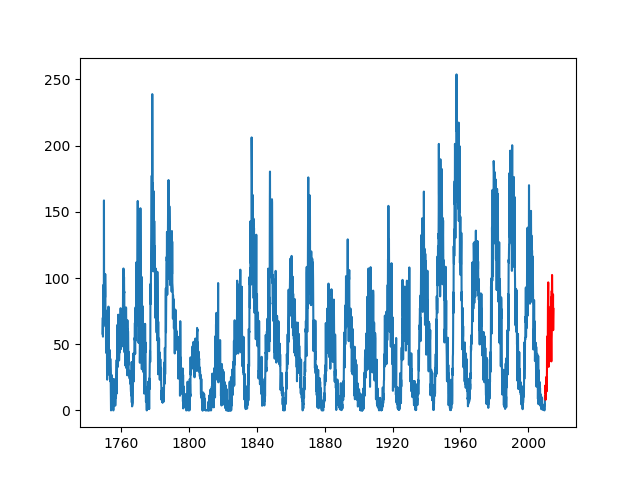

In [8]:
%matplotlib notebook
plt.plot(train)
plt.plot(test, color='red')
plt.show()

In [3]:
data_array = train.values
# https://machinelearningmastery.com/convert-time-series-supervised-learning-problem-python/
def series_to_supervised(data_array, K=1):
    X = np.array([])
    Y = np.array([])

    for i in range(len(data_array)-K):
        X = np.append(X, data_array[i:K+i])
        Y = np.append(Y, data_array[K+i])
    X = X.reshape((-1,K))
    return (X, Y)

X_train, Y_train = series_to_supervised(train.values, 20)
X_test, Y_test = series_to_supervised(train.values, 20)

<IPython.core.display.Javascript object>


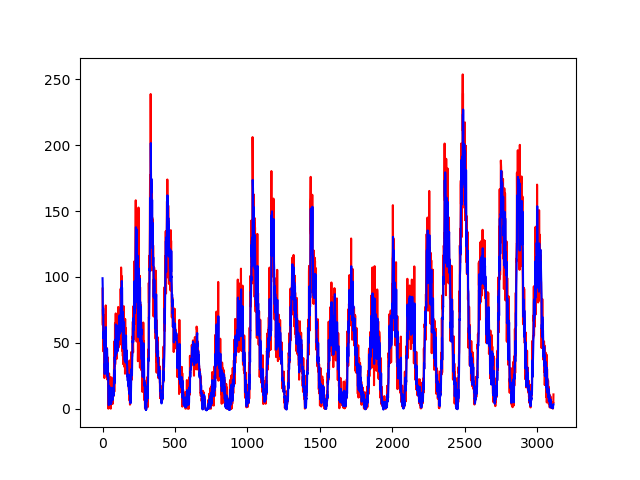

Mean Squared Error: 240.340842 
R2: 0.877964


In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression(fit_intercept=False)
lr = lr.fit(X_train, Y_train)

y_pred = lr.predict(X_test)

%matplotlib notebook
plt.figure(1)
plt.plot(Y_test, color='red')
plt.plot(y_pred, color='blue')
plt.show()

print("Mean Squared Error: %f \nR2: %f" % (mean_squared_error(Y_test,y_pred), r2_score(Y_test,y_pred)))


## (b)

1. Starting with K=20 and do a k-fold division of training data
1. Using a wrapper strategy find the better set of variables to predict the data
1. Use Ridge Regression to predict
1. Use RMSE to compair the performance

In [81]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge

kf = KFold(n_splits=5)

starting_variables = [i for i in range(5)]

while len(starting_variables)>0:
    variables = starting_variables[:]
    for i in range(len(variables)):
        v = variables[:]
        v.pop(i)
    starting_variables.pop(0)
#     error = []
#     for alpha in [0, 1e-5, 1e-4,1e-3,1e-2,1e-1,2e-1,3e-1,4e-1,5e-1,6e-1,7e-1,8e-1,9e-9,1]:
#         error_kf=set()
#         for train, test in kf.split(X_train):
#             lrr = Ridge(alpha=alpha)
#             lrr.fit(X_train[train],Y_train[train])
#             error_kf.add(mean_squared_error(Y_train[test],lrr.predict(X_train[test])))
#         error.append({'mean':min(error_kf), 'alpha':alpha})
#     print(min(error, key=lambda x:x['mean']))    


# X_test[:,variables].shape

[1, 2, 3, 4]
[0, 2, 3, 4]
[0, 1, 3, 4]
[0, 1, 2, 4]
[0, 1, 2, 3]
[2, 3, 4]
[1, 3, 4]
[1, 2, 4]
[1, 2, 3]
[3, 4]
[2, 4]
[2, 3]
[4]
[3]
[]
